# Simple Stock Price Prediction Model

Created by Marc Zeugin

### Import modules

In [61]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import os

### Set tickers

In [57]:
tickers = ['AAL', 'AAPL', 'AAP']

### Load financial data from yahoo finance API or local folder if available

In [58]:
ticker_hist_list = []

for ticker in tickers:
    path = './data/' + ticker + '_data.json'
    if os.path.exists(path=path):
        with open(path) as f:
            temp_ticker_hist = pd.read_json(path)
        ticker_hist_list.append(temp_ticker_hist)
    else:
        temp_ticker = yf.Ticker(ticker=ticker)
        temp_ticker_hist = temp_ticker.history(period='10y')
        ticker_hist_list.append(temp_ticker_hist)

### Save data to local folder

In [51]:
for i in range(len(ticker_hist_list)):
    ticker_hist_list[i].to_json('./data/' + tickers[i] + '_data.json')

### Display some data properties

In [59]:
ticker_hist_list[0].head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2012-06-04,11.906825,11.906825,10.483285,10.539850,13603800,0.0,0
2012-06-05,10.634122,11.067784,10.539849,10.954655,5680300,0.0,0
2012-06-06,11.143204,11.209197,10.916946,11.105494,5216300,0.0,0
2012-06-07,11.143201,11.473161,10.634121,10.634121,8513300,0.0,0
2012-06-08,10.690689,11.529729,10.539851,11.454309,9863800,0.0,0


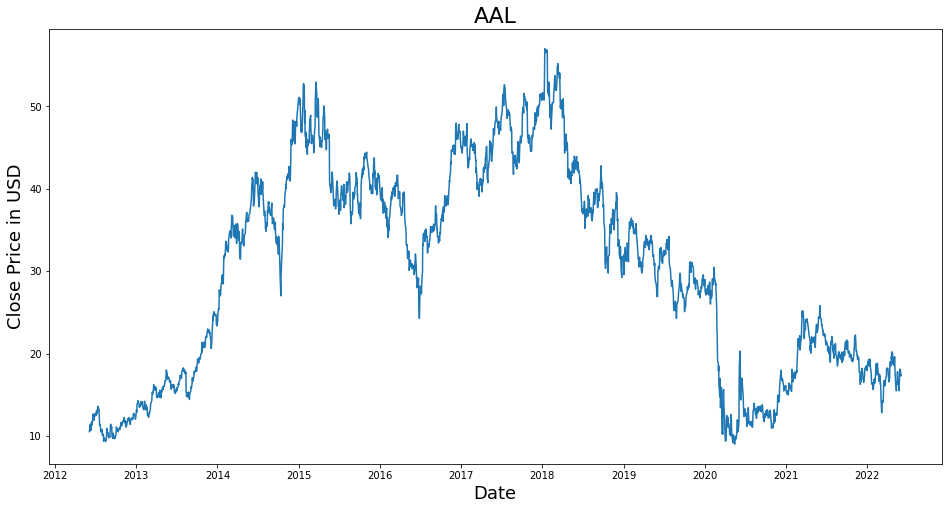

In [64]:
plt.figure(figsize=(16, 8))
plt.title(tickers[0], fontsize=22)
plt.plot(ticker_hist_list[0]['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize=18)
plt.show()